# Lungs Desease Prediction Model

### Dataset Link :- https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Import Important Liberary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.applications import VGG16
from keras.models import Sequential

In [3]:
IMAGE_SIZE = [224,224]

train_path = '/content/gdrive/MyDrive/kaggle_dataset/chest-xray-pneumonia/chest_xray/train'
test_path = '/content/gdrive/MyDrive/kaggle_dataset/chest-xray-pneumonia/chest_xray/test'

### Transfer Learning
#### Using VGG16 Architecture 

In [34]:
vgg = VGG16(include_top=False, weights='imagenet',input_shape=IMAGE_SIZE+[3])
vgg.trainable = False

### Adding Neural Network Layers

In [6]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


### Compiling the model

In [29]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

### Data Augmentation

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255,horizontal_flip = True, shear_range=0.2, zoom_range=0.2)
test_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_gen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/chest-xray-pneumonia/chest_xray/train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode='binary')

Found 5216 images belonging to 2 classes.


In [24]:
test_generator = test_gen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/chest-xray-pneumonia/chest_xray/test',
                                              target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode='binary')

Found 624 images belonging to 2 classes.


In [42]:
validation_generator = valid_gen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/chest-xray-pneumonia/chest_xray/val',
                                                     target_size=(224,224),
                                                     batch_size = 32,
                                                     class_mode='binary')

Found 16 images belonging to 2 classes.


### Training the Model

In [31]:
res = model.fit(train_generator, validation_data=validation_generator, batch_size=32, epochs=5)

Epoch 1/5
163/163 [==============================] - 1477s 9s/step - loss: 0.1645 - accuracy: 0.9358 - val_loss: 0.2220 - val_accuracy: 0.9263
Epoch 2/5
163/163 [==============================] - 109s 670ms/step - loss: 0.1086 - accuracy: 0.9599 - val_loss: 0.2243 - val_accuracy: 0.9263
Epoch 3/5
163/163 [==============================] - 108s 665ms/step - loss: 0.1071 - accuracy: 0.9580 - val_loss: 0.2277 - val_accuracy: 0.9215
Epoch 4/5
163/163 [==============================] - 109s 669ms/step - loss: 0.0875 - accuracy: 0.9661 - val_loss: 0.4703 - val_accuracy: 0.8622
Epoch 5/5
163/163 [==============================] - 109s 667ms/step - loss: 0.1006 - accuracy: 0.9630 - val_loss: 0.2537 - val_accuracy: 0.9263


### Saving The Model

In [33]:
from keras.models import load_model
model.save('lungs_disease_prediction.h5')

### Analyzing the of Model

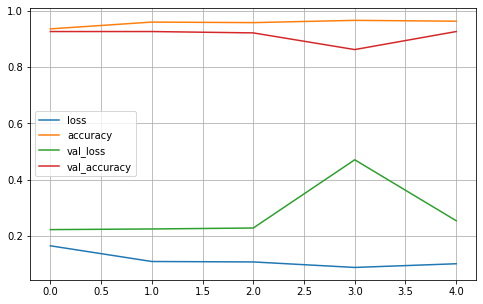

In [38]:
pd.DataFrame(res.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [46]:
accuracy = model.evaluate_generator(test_generator)[1]*100

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [47]:
print("Accuracy of Model :=> " ,accuracy,"%")

Accuracy of Model :=>  93.75 %
